# Color Filtering

In [658]:
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:


def resize(img, scale): # resize image to scale value param
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ) )


def scaled(img, scale): # returns new scale value
    img_shape_x, img_shape_y, channels = img.shape
    if img_shape_x > scale:
        return scale / img_shape_x
    else:
        return 1
    

def color_filter(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask



In [418]:
img_folder = "../images/"

img_base_name = "1257" # 1227, 1231, 1249, 1257, 1259
img_path = img_folder + img_base_name + ".jpg"

img = cv2.imread(img_path)

img.shape

(608, 808, 3)

OpenCV native format - BGR


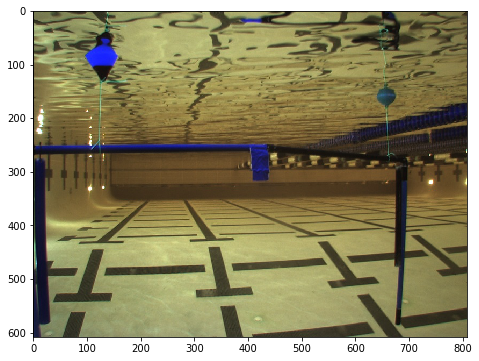

RGB


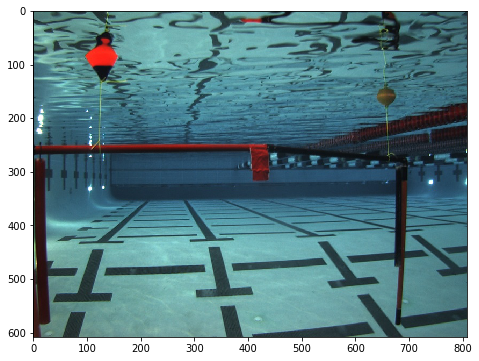

HSV


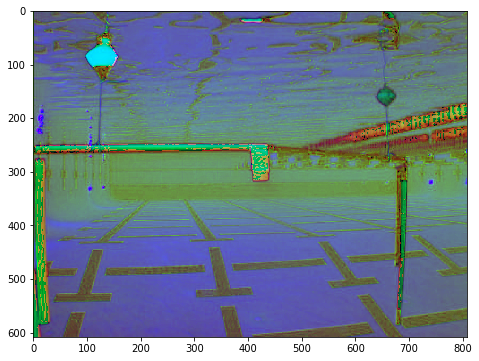

In [659]:
print("OpenCV native format - BGR")
plt.figure(figsize=(10, 6) )
plt.imshow(img)
plt.show()

print("RGB")
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.show()

print("HSV")
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV) )
plt.show()

# color thresh
---

In [697]:
## RGB TEST VALUES
#lower_thresh = np.array([0, 0, 0])
#upper_thresh = np.array([100, 100, 100])

#img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [803]:
## HSV TEST VALUES
#lower_thresh = np.array([0, 0, 0])
#upper_thresh = np.array([180, 255, 60])

lower_thresh = np.array([0, 100, 0])
upper_thresh = np.array([180, 200, 150])

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 1227 - [0, 0, 0] -> [180, 255, 50]
# 1231 - same

In [804]:
#img_color_filt, mask = color_filter(img_rgb, [lower_thresh, upper_thresh] )
img_color_filt, mask = color_filter(img_hsv, [lower_thresh, upper_thresh] )

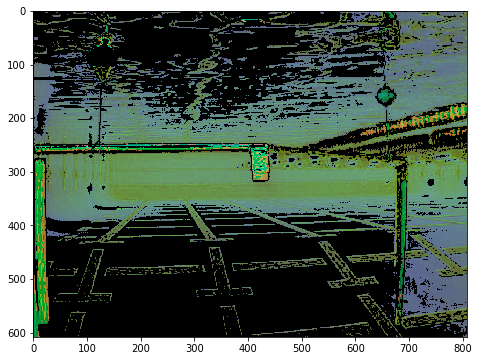

In [805]:
plt.figure(figsize=(10, 6) )
plt.imshow(img_color_filt) # original color space
plt.show()

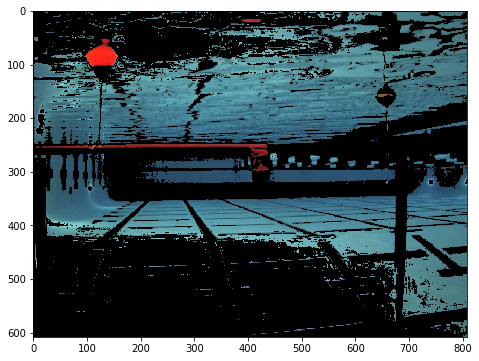

In [796]:

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_HSV2RGB) )
plt.show()

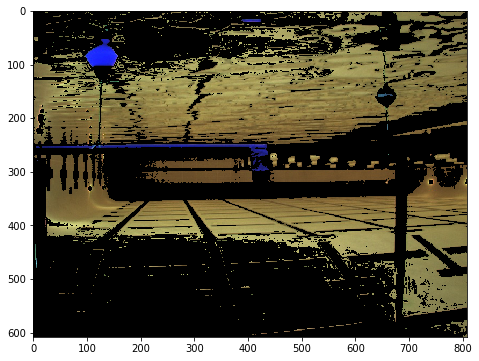

In [797]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_HSV2BGR) )
plt.show()

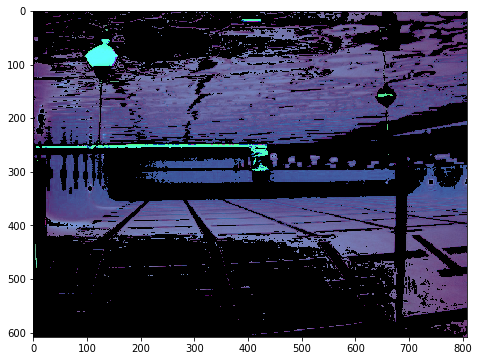

In [798]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_RGB2HSV) )
plt.show()

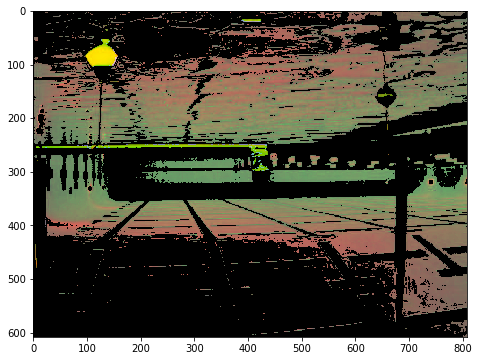

In [799]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_RGB2BGR) )
plt.show()

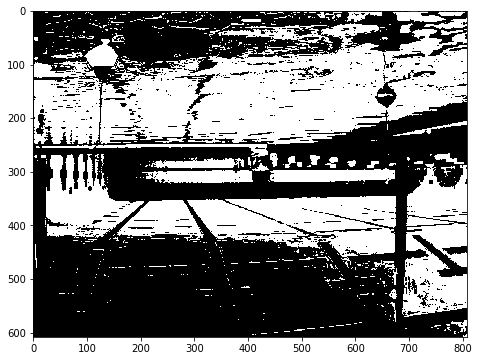

In [800]:
plt.figure(figsize=(10, 6) )
plt.imshow(mask, cmap="gray")
plt.show()

*prev mask compare*

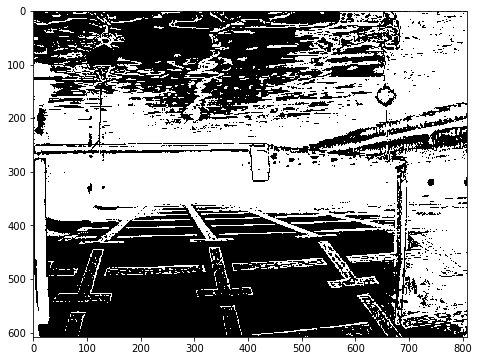

In [784]:
plt.figure(figsize=(10, 6) )
plt.imshow(mask, cmap="gray")
plt.show()

# color filter pt. 2
---

In [647]:
## RGB TEST VALUES
lower_thresh_2 = np.array([0, 0, 0])
upper_thresh_2 = np.array([255, 100, 255])

img_rgb_2 = img_color_filt.copy()

In [648]:
## HSV TEST VALUES
#lower_thresh = np.array([0, 0, 0])
#upper_thresh = np.array([180, 255, 60])

img_hsv_2 = img_color_filt.copy()

In [649]:
img_color_filt_2, mask_2 = color_filter(img_rgb_2, [lower_thresh_2, upper_thresh_2] )
#img_color_filt_2, mask_2 = color_filter(img_hsv_2, [lower_thresh_2, upper_thresh_2] )

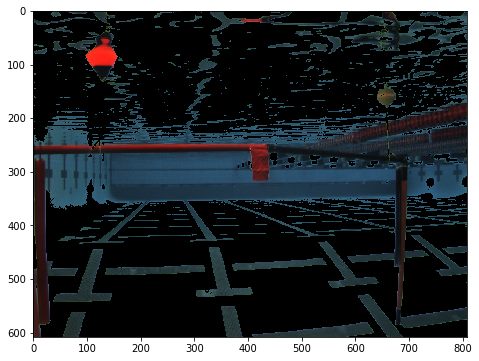

In [650]:
plt.figure(figsize=(10, 6) )
plt.imshow(img_color_filt_2)
plt.show()

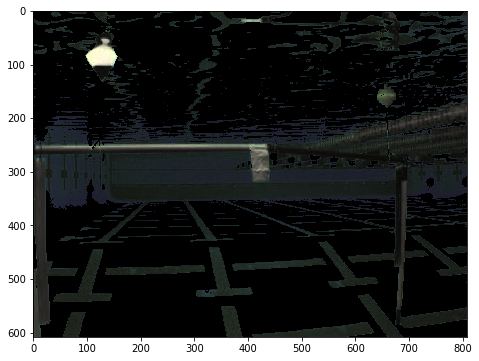

In [625]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt_2, cv2.COLOR_HSV2RGB) )
plt.show()

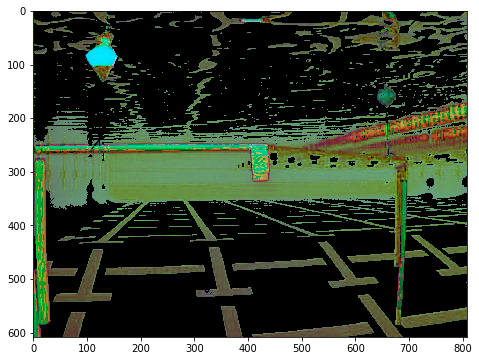

In [626]:
plt.figure(figsize=(10, 6) )
#plt.imshow(cv2.cvtColor(img_color_filt_2, cv2.COLOR_HSV2BGR) )
plt.imshow(cv2.cvtColor(img_color_filt_2, cv2.COLOR_BGR2HSV) )
plt.show()

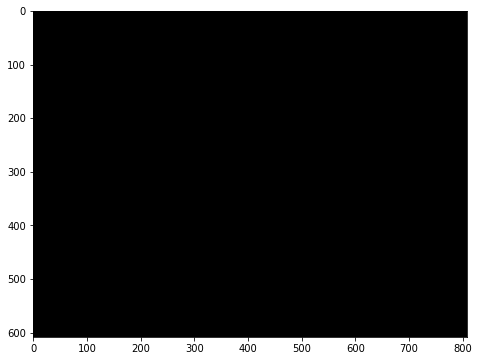

In [627]:
plt.figure(figsize=(10, 6) )
plt.imshow(mask_2, cmap="gray")
plt.show()

# final compare (pt. 1 VS pt. 2)
---

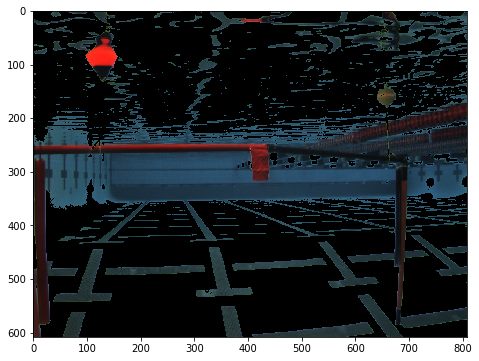

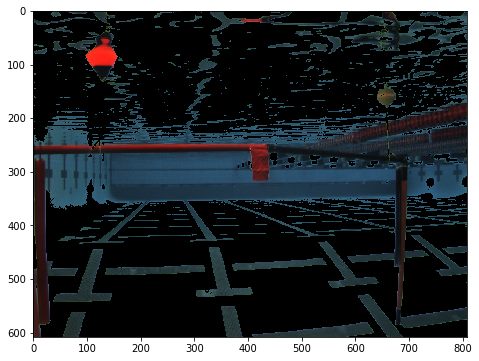

In [651]:
plt.figure(figsize=(10, 6) )
plt.imshow(img_color_filt)
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(img_color_filt_2)
plt.show()

# mask
---

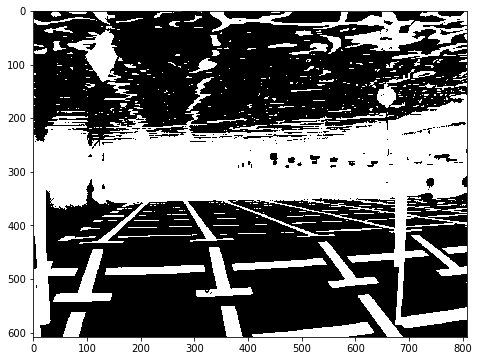

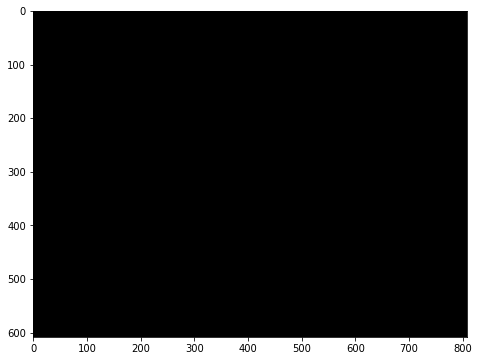

In [643]:
plt.figure(figsize=(10, 6) )
plt.imshow(mask, cmap="gray")
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(mask_2, cmap="gray")
plt.show()